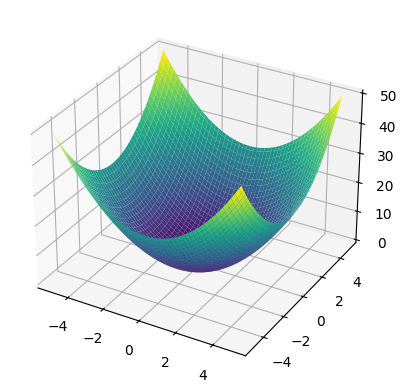

In [1]:
import ipywidgets as widgets
from IPython.display import display, HTML, clear_output
import threading
import asyncio
import time
import molecule as mol
import os 

In [15]:
mols = {}
for file in os.listdir('../data/stgaps_coordinates'):
    mols[os.path.basename(file).split('.')[0]] = mol.Molecule(filename=f'../data/stgaps_coordinates/{file}')

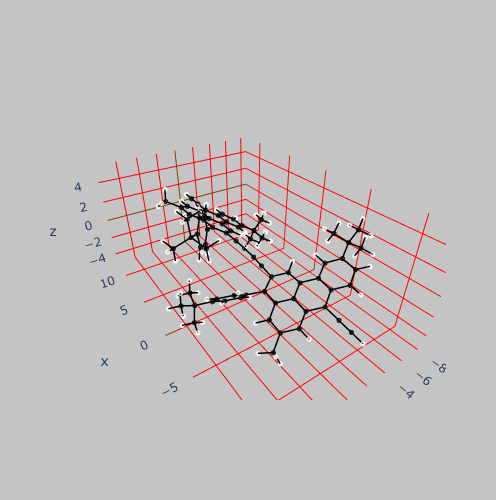

In [18]:
list_names = [string for string in mols]
mols[list_names[0]].show()

In [5]:
display('Display in main thread')
out = widgets.Output()
display(out)

thread = threading.Thread(
    target = thread_func,
    args = ("some text", out))
thread.start()

'Display in main thread'

Output()

In [6]:
thread.join()

In [2]:
button = widgets.Button(description="Click me!")
output = widgets.Output()

display(button,output)

def on_button_clicked(b):
    with output:
        mols[list_names[0]].show()

button.on_click(on_button_clicked)

Button(description='Click me!', style=ButtonStyle())

Output()

In [10]:
atom_text = widgets.Text(
    value='',
    placeholder='Atoms here',
    description='Atoms 1,2,3:',
    disabled=False,
)
submit_button = widgets.Button(
    description='Submit',
    disabled=False,
    button_style='',
    tooltip='Click when atoms entered',
    icon='check',
)
out=widgets.Output()

def submit_atoms(atom_text,out):
    atoms = atom_text.split(',')
    if len(atoms) != 3:
        raise ValueError('Needs 3 atoms')
    new_atoms = []
    for atom in atoms:
        new_atoms.append(atom.strip())
    atoms = new_atoms
    with out:
        print(atoms)

                        
def on_submit(b):
    with out:
        clear_output(wait=True)
        print(f"Recieved input: {atom_text.value}")
        process_input(text_input.value)
    
submit_button.on_click(on_submit)

display(atom_text,submit_button)

Text(value='', description='Atoms 1,2,3:', placeholder='Atoms here')

Button(description='Submit', icon='check', style=ButtonStyle(), tooltip='Click when atoms entered')

In [20]:
text_input = widgets.Text(
    value='',
    placeholder='Enter Atoms',
    description='Atoms (A1,A2,A3):',
    disabled=False
)

button = widgets.Button(description="Submit")
output = widgets.Output()

def edit_molecule(molecule,name):
    with output:
        clear_output(wait=True)
        print(f"Recieved input: {text_input.value}")

        atoms = text_input.value.split(',')
        new_atoms = []
        for atom in atoms:
            atom = atom.strip()
            new_atoms.append(atom)
        atoms = new_atoms
        new_molecule = molecule.align_to_plane(atoms)
        new_molecule.show()
        new_molecule.write_xyz(f'{name}.xyz')
    pass

for name in list_names:
    mol = mols[name]
    def on_button_click(b):
        edit_molecule(mol,name)
        text_input.value = ''
    button.on_click(on_button_click)

    with out:
        print(name)
        mol.show()
        
    display(text_input,button,output)

    output.clear_output()

    


Text(value='', description='Atoms (A1,A2,A3):', placeholder='Enter Atoms')

Button(description='Submit', style=ButtonStyle())

Output()